In [322]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

#Download data

#df of log returns
df_60m=pd.read_parquet("data/clean/60m/data_clean_60m_log_ret.parquet")


#df of close prices
df_60m_close= pd.read_parquet("data/clean/60m/data_clean_60m_close.parquet")

#df of normalized close prices
df_60m_close_norm=df_60m_close/df_60m_close.iloc[0]

In [281]:
tickers = pd.read_csv('tickers/s&p.csv')

#Sort tickers by symbol to have same order as df
tickers=tickers.sort_values(by=['Symbol'])

#Take out tickers not in df
tickers=tickers[tickers["Symbol"].isin(df_60m.columns)]
tickers.reset_index(drop=True, inplace=True)

tickers

,Symbol,Name,Sector
0,A,Agilent Technologies,Health Care
1,AAL,American Airlines Group,Industrials
2,AAP,Advance Auto Parts,Consumer Discretionary
3,AAPL,Apple,Information Technology
4,ABBV,AbbVie,Health Care
...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary
499,ZBH,Zimmer Biomet,Health Care
500,ZBRA,Zebra Technologies,Information Technology
501,ZION,Zions Bancorp,Financials


In [330]:
#Reorder columns alphabetically

col=tickers["Symbol"]
df_60m=df_60m[col]
df_60m_close=df_60m_close[col]
df_60m_close_norm=df_60m_close/df_60m_close.iloc[0]

In [331]:
#Get random sample for plot

sequence = [i for i in range(len(df_60m.columns))]
subset = sample(sequence, 10)

In [327]:
tickers["Sector"].unique()

array(['Health Care', 'Industrials', 'Consumer Discretionary',
       'Information Technology', 'Consumer Staples', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Energy',
       'Communication Services'], dtype=object)

In [328]:
industrials=tickers[tickers["Sector"]=="Industrials"].index
industrials

Int64Index([  1,  24,  26,  30,  39,  53,  76,  77,  91, 101, 110, 114, 115,
            125, 127, 139, 154, 158, 165, 171, 176, 178, 180, 193, 194, 195,
            201, 209, 218, 221, 229, 233, 237, 244, 248, 250, 251, 252, 268,
            270, 274, 278, 284, 292, 306, 331, 332, 335, 346, 352, 357, 366,
            373, 383, 393, 397, 398, 399, 401, 402, 411, 421, 428, 429, 446,
            450, 454, 459, 460, 461, 469, 475, 484, 497],
           dtype='int64')

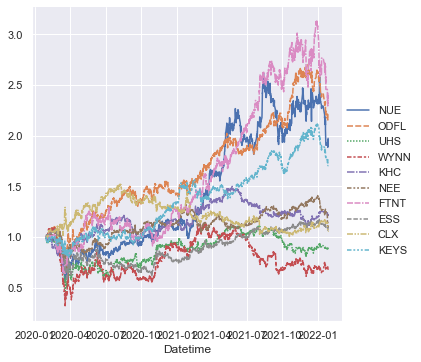

In [332]:
#Plot of normalized close values
#Problem is that I dont know ho to reduce the size of legend (too many points that is why I had a random sample)

sns.set() # set default style 
sns.relplot(data=df_60m_close_norm[df_60m_close_norm.columns[subset]], kind="line",legend="brief")


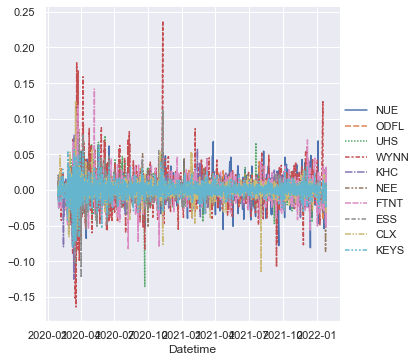

In [333]:
#Plot of log returns

sns.set() # set default style 
sns.relplot(data=df_60m[df_60m.columns[subset]], kind="line",legend="brief")



In [290]:
#Create staked df for plotting

df_staked=df_60m.stack(level=[0]).reset_index(level=[1]).rename(columns={'level_1': 'Ticker', 0: "Logret"})

to_rep=tickers["Sector"]

rep=int(len(df_staked)/len(df_60m.columns))
sec=np.tile(to_rep,rep)

#Add columns with sector and date to dataframe
df_staked["Sector"]=sec
df_staked["Date"]=df_staked.index

df_stacked

In [ ]:
sns.set() # set default style 
sns.relplot(data=df_staked, x="Date", y= "Logret", kind="line", col="Sector",hue="Ticker",col_wrap=5, legend=False)

